# **Importing need libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the data**

In [ ]:
df = pd.read_csv('logistic_regression.csv')

In [ ]:
pd.set_option('display.max_columns', None) # View all the columns



---



In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

# Column detail
- **loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **term** : The number of payments on the loan. Values are in months and can be either 36 or 60.
- **int_rate** : Interest Rate on the loan
- **installment** : The monthly payment owed by the borrower if the loan originates.
- **grade** : LoanTap assigned loan grade
- **sub_grade** : LoanTap assigned loan subgrade
- **emp_title** :The job title supplied by the Borrower when applying for the loan.*
- **emp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
- **annual_inc** : The self-reported annual income provided by the borrower during registration.
- **verification_status** : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- **issue_d** : The month which the loan was funded
- **loan_status** : Current status of the loan - Target Variable
- **purpose** : A category provided by the borrower for the loan request.
- **title** : The loan title provided by the borrower
- **dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- **earliest_cr_line** :The month the borrower's earliest reported credit line was opened
- **open_acc** : The number of open credit lines in the borrower's credit file.
- **pub_rec** : Number of derogatory public records
- **revol_bal** : Total credit revolving balance
- **revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **total_acc** : The total number of credit lines currently in the borrower's credit file
- **initial_list_status** : The initial listing status of the loan. Possible values are – W, F
- **application_type** : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- **mort_acc** : Number of mortgage accounts.
- **pub_rec_bankruptcies** : Number of public record bankruptcies
- **Address**: Address of the individual

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
mort_acc,37795
emp_title,22927
emp_length,18301
title,1756
pub_rec_bankruptcies,535
revol_util,276
installment,0
int_rate,0
term,0
grade,0


Separating the Null data from whole data and Imputing the null data

In [ ]:
null_data = ((df.isnull().sum().sort_values(ascending = False) / df.shape[0])*100).reset_index()
null_data.columns = ["Column_name" , "Missing_data_percentage"]
null_data[null_data["Missing_data_percentage"] > 0]

,Column_name,Missing_data_percentage
0,mort_acc,9.543469
1,emp_title,5.789208
2,emp_length,4.621115
3,title,0.443401
4,pub_rec_bankruptcies,0.135091
5,revol_util,0.069692


In [ ]:
null_val = df[['emp_title','emp_length','title','revol_util','mort_acc','pub_rec_bankruptcies']]

Imputing null values with Numeric values with median and Categorical with Most occuring values

In [ ]:
df['emp_title'].fillna('Not Mensioned', inplace=True)

/tmp/ipython-input-1804813187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_title'].fillna('Not Mensioned', inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy = "most_frequent")

In [ ]:
df[null_val.columns[3:]] = num_imputer.fit_transform(df[null_val.columns[3:]])
df[null_val.columns[1:3]] = cat_imputer.fit_transform(df[null_val.columns[1:3]])

In [ ]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


Checking the value of each column for any anomoly

In [ ]:
for col in df.columns:
  print(f"------------------------------------------------------ {col} ------------------------------------------------------")
  print(f"{col} : has {df[col].nunique()} unique values and the list of values is given below ")
  print(f"{df[col].unique()}")
  print(f"-------------------------------------------------------------------------------------------------------------------------")



------------------------------------------------------ loan_amnt ------------------------------------------------------
loan_amnt : has 1397 unique values and the list of values is given below 
[10000.  8000. 15600. ... 36275. 36475.   725.]
-------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------ term ------------------------------------------------------
term : has 2 unique values and the list of values is given below 
[' 36 months' ' 60 months']
-------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------ int_rate ------------------------------------------------------
int_rate : has 566 unique values and the list of values is given below 
[11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.9

Cleaning the columns

Terms

In [ ]:
# Removing the extra space and getting only the numerical part and converting it into int
df['term'] = df['term'].apply(lambda x : x.strip().split(' ')[0]).astype('int')

Emp_length

In [ ]:
def emp_length(x):
  if len(x) == 2 and len(x[0]) == 3:
    return int(x[0][:2])
  elif len(x) == 2:
    return int(x[0])
  elif len(x) == 3 and x[0] == '<':
    return 0
  else:
    return x[0]

In [ ]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [ ]:
df['emp_length'] = df['emp_length'].apply(lambda x : emp_length(str(x).split(' ')))

Coverting string into Date format

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

/tmp/ipython-input-1327595845.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])
/tmp/ipython-input-1327595845.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
loan_amnt,396030.0,14113.888089,500.0,8000.0,12000.0,20000.0,40000.0,8357.441341
term,396030.0,41.698053,36.0,36.0,36.0,36.0,60.0,10.212038
int_rate,396030.0,13.6394,5.32,10.49,13.33,16.49,30.99,4.472157
installment,396030.0,431.849698,16.08,250.33,375.43,567.3,1533.81,250.72779
emp_length,396030.0,6.126261,0.0,3.0,7.0,10.0,10.0,3.661069
annual_inc,396030.0,74203.175798,0.0,45000.0,64000.0,90000.0,8706582.0,61637.621158
issue_d,396030,2014-02-02 15:57:58.045602560,2007-06-01 00:00:00,2013-05-01 00:00:00,2014-04-01 00:00:00,2015-03-01 00:00:00,2016-12-01 00:00:00,NaN
dti,396030.0,17.379514,0.0,11.28,16.91,22.98,9999.0,18.019092
earliest_cr_line,396030,1998-05-03 09:34:15.062495488,1944-01-01 00:00:00,1994-10-01 00:00:00,1999-09-01 00:00:00,2003-04-01 00:00:00,2013-10-01 00:00:00,NaN
open_acc,396030.0,11.311153,0.0,8.0,10.0,14.0,90.0,5.137649


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,396030,173106,Not Mensioned,22927
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507
title,396030,48816,Debt consolidation,154228
initial_list_status,396030,2,f,238066
application_type,396030,3,INDIVIDUAL,395319


Univariate Analysis

Loan Amount

<Axes: xlabel='loan_amnt', ylabel='Count'>

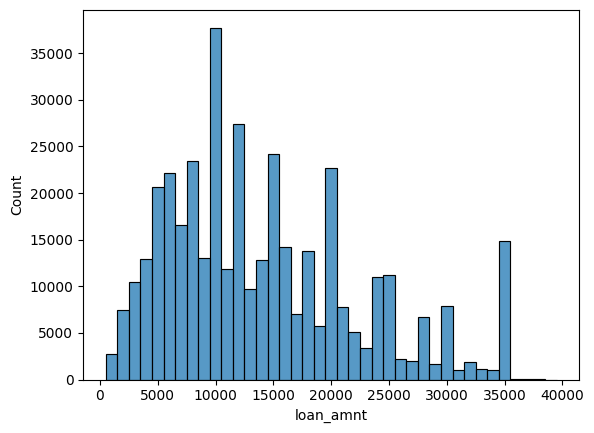

In [ ]:
sns.histplot(df['loan_amnt'], bins=np.arange(df['loan_amnt'].min(), df['loan_amnt'].max() + 500, 1000))

<Axes: xlabel='term', ylabel='count'>

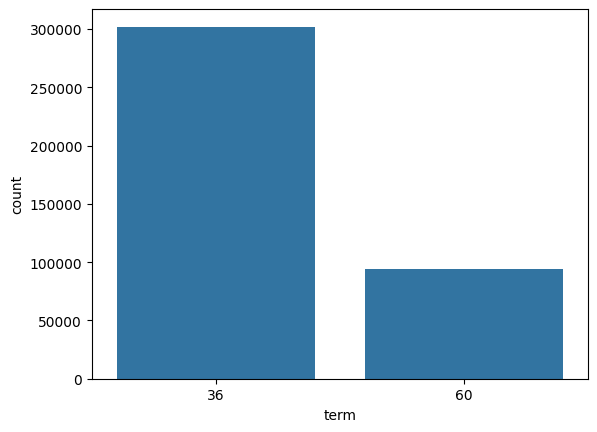

In [ ]:
sns.countplot(data=df, x='term')

<Axes: xlabel='int_rate', ylabel='Count'>

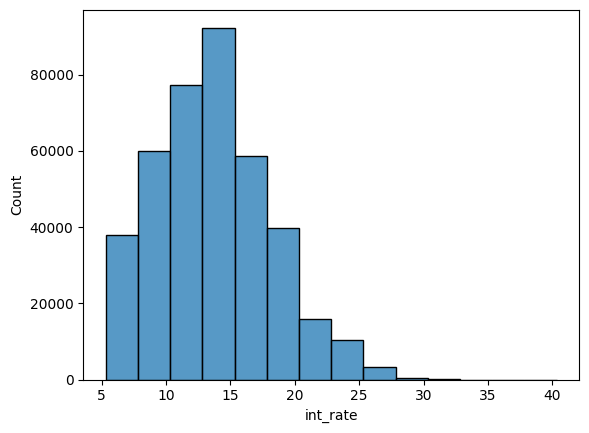

In [ ]:
sns.histplot(df['int_rate'], bins=np.arange(df['int_rate'].min(), df['int_rate'].max() + 10, 2.5))

In [ ]:
df['installment'].describe()

,installment
count,396030.000000
mean,431.849698
std,250.727790
min,16.080000
25%,250.330000
50%,375.430000
75%,567.300000
max,1533.810000


<Axes: xlabel='installment', ylabel='Count'>

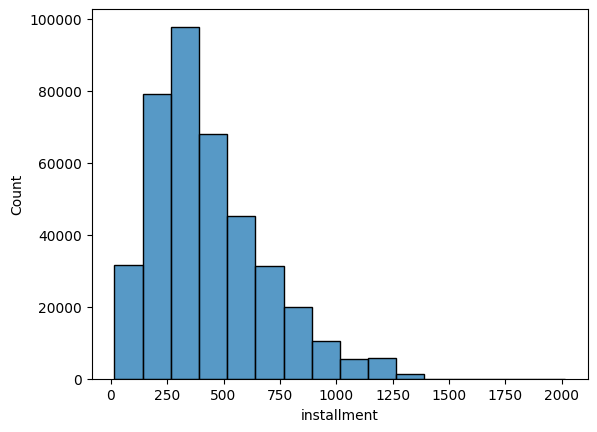

In [ ]:
sns.histplot(df['installment'], bins=np.arange(df['installment'].min(), df['installment'].max() + 500, 125))

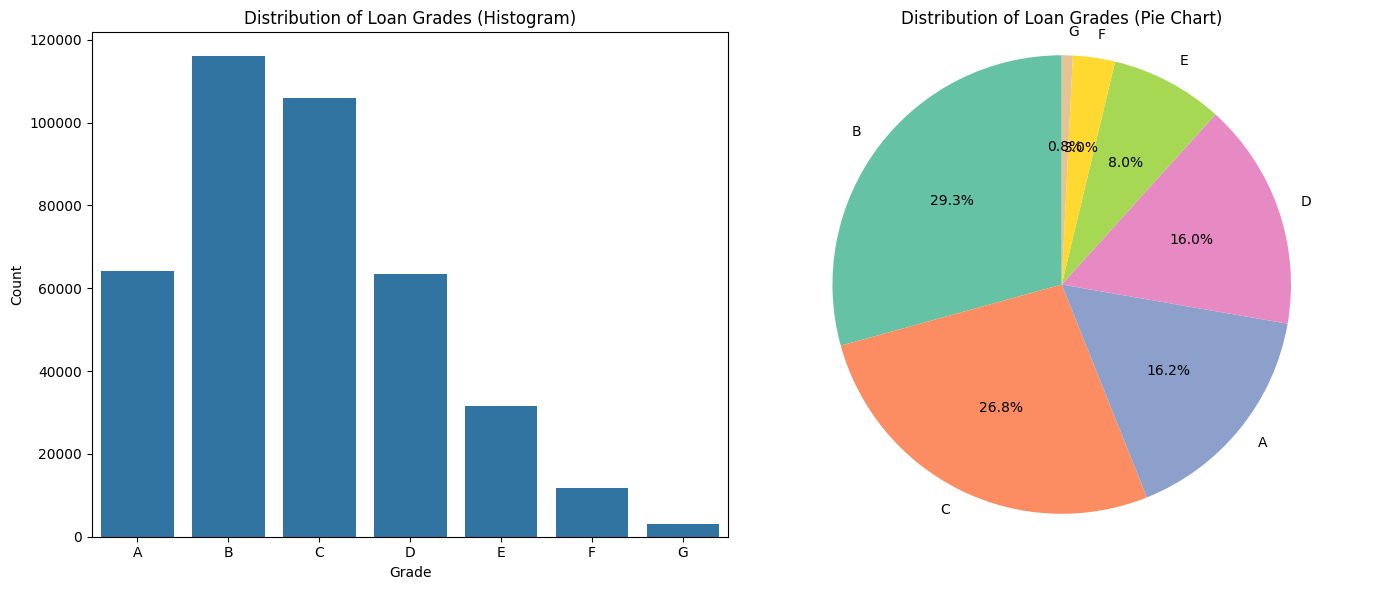

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
# Handle potential non-string values before sorting
valid_grades = df['grade'].dropna().astype(str).unique()
sns.countplot(data=df, x='grade', order=sorted(valid_grades), ax=axes[0])
axes[0].set_title('Distribution of Loan Grades (Histogram)')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count')

# Pie chart
grade_counts = df['grade'].value_counts()
axes[1].pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(grade_counts)))
axes[1].set_title('Distribution of Loan Grades (Pie Chart)')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

In [ ]:
df['emp_title'].value_counts().head(10).reset_index()

,emp_title,count
0,Not Mensioned,22927
1,Teacher,4389
2,Manager,4250
3,Registered Nurse,1856
4,RN,1846
5,Supervisor,1830
6,Sales,1638
7,Project Manager,1505
8,Owner,1410
9,Driver,1339


<Axes: xlabel='emp_length', ylabel='count'>

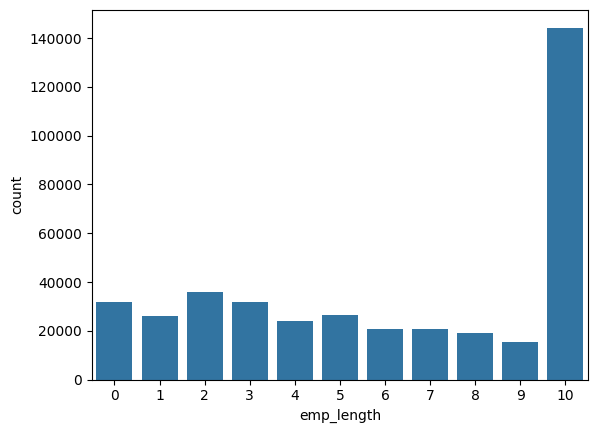

In [ ]:
sns.countplot(data=df, x='emp_length', order=sorted(df['emp_length'].unique()))

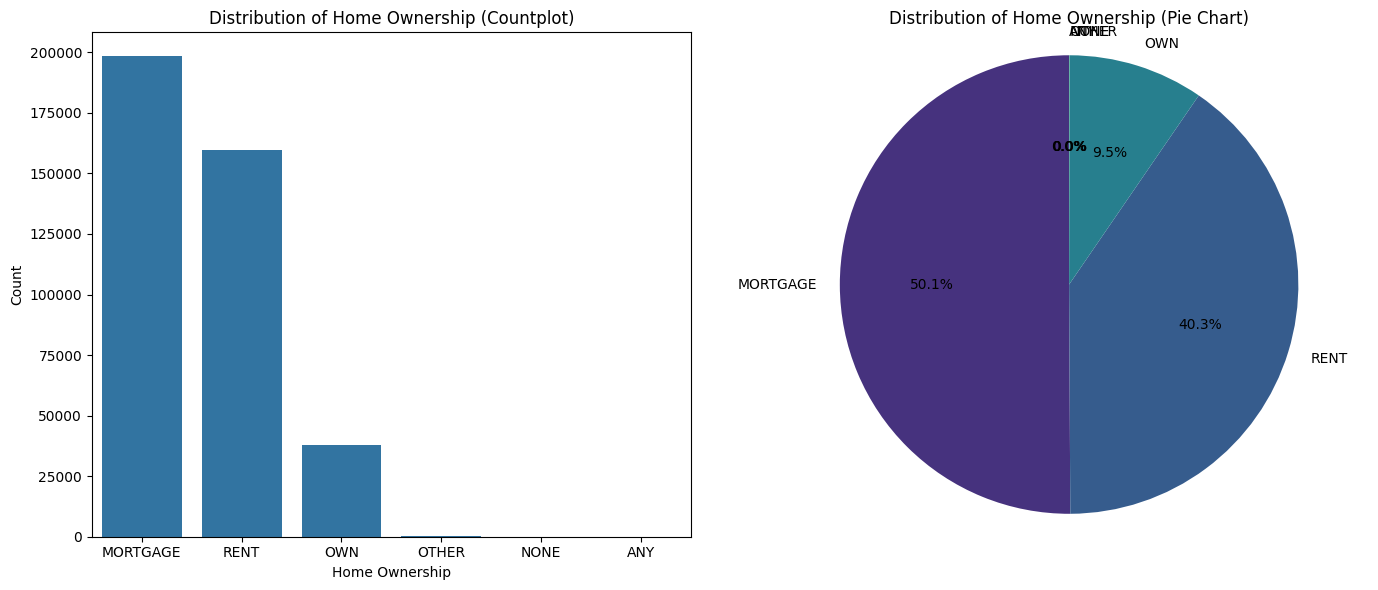

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
sns.countplot(data=df, x='home_ownership', order=df['home_ownership'].value_counts().index, ax=axes[0])
axes[0].set_title('Distribution of Home Ownership (Countplot)')
axes[0].set_xlabel('Home Ownership')
axes[0].set_ylabel('Count')

# Pie chart
home_ownership_counts = df['home_ownership'].value_counts()
axes[1].pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(home_ownership_counts)))
axes[1].set_title('Distribution of Home Ownership (Pie Chart)')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

Annual Income

In [ ]:
bin = np.arange(df['annual_inc'].min(), df['annual_inc'].max() + 10, 10)
bin

array([0.00000e+00, 1.00000e+01, 2.00000e+01, ..., 8.70657e+06,
       8.70658e+06, 8.70659e+06])

In [ ]:
df['verification_status'].value_counts()

,count
verification_status,
Verified,139563
Source Verified,131385
Not Verified,125082


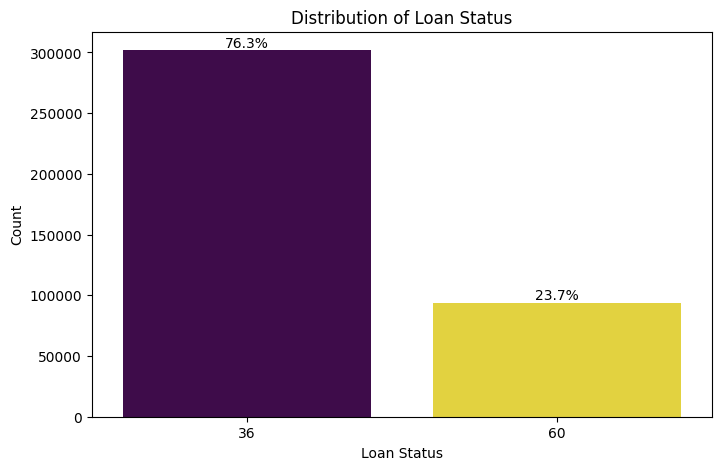

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='term', palette='viridis', hue='term', legend=False)

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

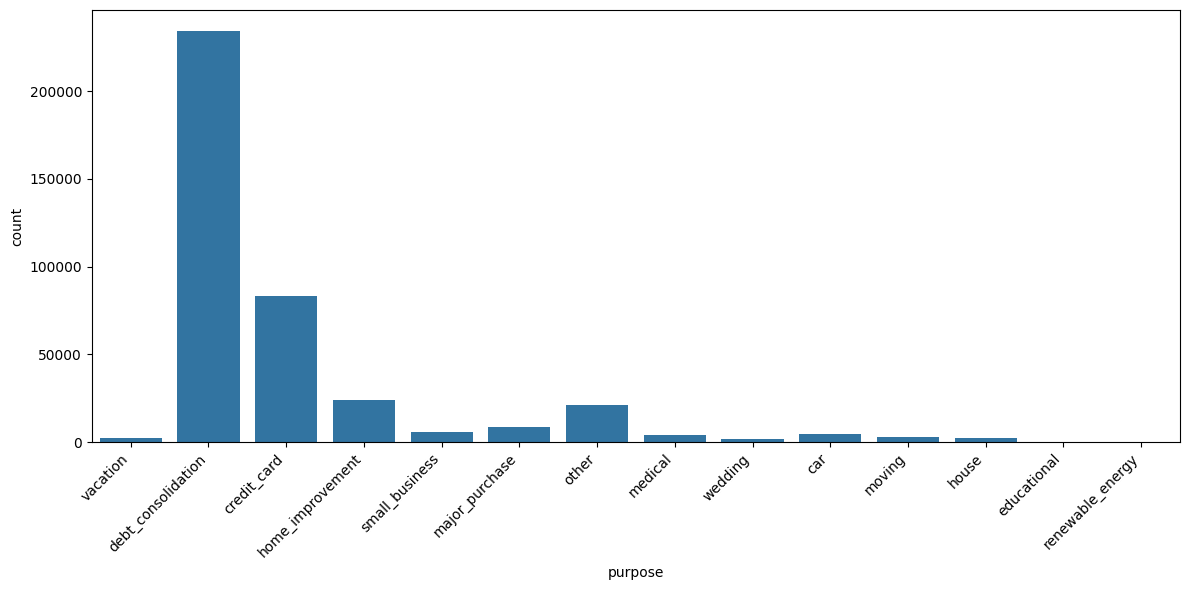

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='purpose')

# Get current x-axis tick locations and labels
ticks = ax.get_xticks()
labels = ax.get_xticklabels()

# Set the ticks and labels with rotation
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'credit_history_length'],
      dtype='object')

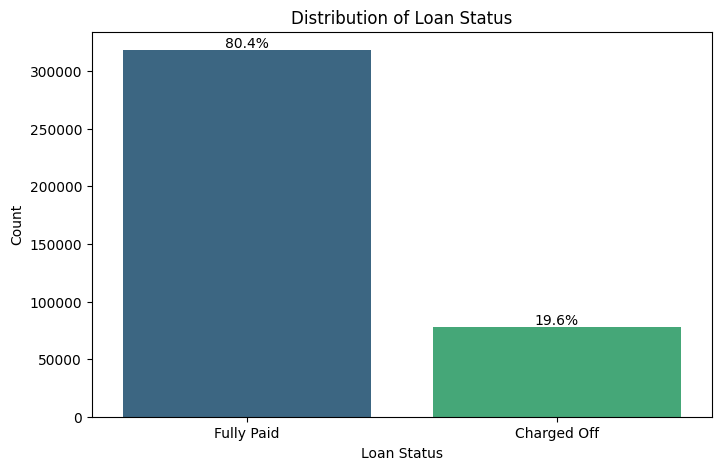

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='loan_status', palette='viridis', hue='loan_status', legend=False)

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [ ]:
df['loan_amnt'].describe()

,loan_amnt
count,396030.000000
mean,14113.888089
std,8357.441341
min,500.000000
25%,8000.000000
50%,12000.000000
75%,20000.000000
max,40000.000000


<Axes: xlabel='installment', ylabel='loan_amnt'>

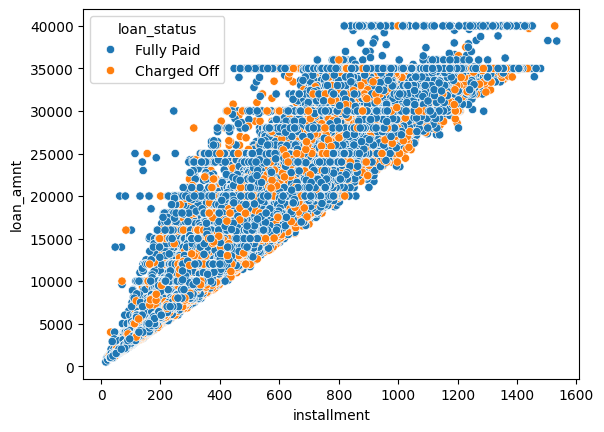

In [ ]:
sns.scatterplot(data=df, x='installment', y='loan_amnt',hue='loan_status')